---
title: Mandalas, high school math and Python
categories:
    - python
    - mathematics
image: layered-circles.jpeg
date: 2024-12-27
Execute:
    freeze: auto
code-fold: true
---

Even the most un-artistic of us would have drawn that six petal flower inside a circle in school. How do I know? I drew it!

The other day, I started with that and went on to draw more and more circles, creating a mandala. And then I found myself thinking about the math of it and writing code in Python. 

## Draw a simple mandala

I started with drawing a six petal mandala and by drawing more and more circles, ended up with a 24 circle mandala. One does not need any calculation to do this on paper. Draw a circle, and at any point of the circumference, draw a circle of the same radius. At the points the circles intersect, draw more circles. You get six circles. 

Now identify the midpoint of the centers of any two circles and with that as the starting point, repeat the process. Go on and do this a couple more times, and you end up with a figure that has 24 overlapping circles going around the first circle. After a few more circles and some coloring, you have a mandala. 

::: {.panel-tabset}

## 6 circles

![](6.jpg)

## 12 circles

![](12.jpg)

## 24 circles

![](24.jpg)

## Mandala

![](mandala.jpg)

:::

## Write some code to create it

The key idea here is to imagine a circle, think of a way to identify 24 equally spaced points around, and draw a circle of the same radius at each of the 24 points. 

### Identify the points around the circle

The math is - Imagine a circle of radius r. the angle around the circle is 2$\pi$. Divide this angle into 24 parts and think of 2$\pi$/24 as $\alpha$ . for $\theta$ = $\alpha$, 2$\alpha$, 3$\alpha$ etc., find r\*cos $\theta$ and r\*sin $\theta$. These are the $x$ and $y$ coordinates of the 24 points. 

### Draw the circles

Now, draw a circle at each of the points. Here is where the power of programming comes into play. Once we figure out how to draw one circle, we can use a loop to do the same thing again and again. 

It took sometime to figure out matplotlib but I ended up with this. 

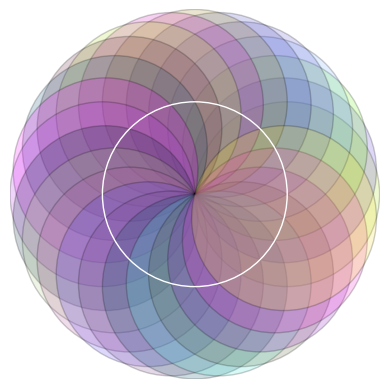

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()
r = 10
draw_center_circle=plt.Circle((0,0),10, fill=False, edgecolor='white')

# Draw 24 circles with random colors
## this sets up the loop for identifying the 24 points and drawing a circle at each point. 
for i in range(24): 
    theta = i * (2 * np.pi / 24)
    x1 = r * np.cos(theta)
    y1 = r * np.sin(theta)
    color = random_hex_color()
    draw_circle = plt.Circle((x1, y1), r, fill=True, edgecolor='black',facecolor=color,alpha=0.2)
    axes.add_artist(draw_circle)


axes.add_artist(draw_center_circle)

axes.set_aspect(1)
axes.set_xlim(-2*r, 2*r)
axes.set_ylim(-2*r, 2*r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()

These circles are overlapping but we do not know the points of intersection, so we cannot color the spaces between intersections. One way I could think of making them look good is to fill them with random colors and make them a little transparent. alpha value does this. 

## We need smaller figures that can be colored

Next, I thought of drawing smaller circles, equally spaced around the large circle, without overlap. We already know how to identify a given number of equally spaced points around the circle. 

### Identify $n$ equally spaced points around the circle

The math is, exactly as the above case - think of a circle of radius r. The angle around the circle is 2$\pi$. Imagine we are going to draw $n$ circles, divide the total angle into $n$ parts, each part is $\alpha$ = 2$\pi$/$n$. for $\theta$ = $\alpha$, 2$\alpha$, 3$\alpha$ etc., find r\*cos $\theta$ and r\*sin $\theta$. These are the $x$ and $y$ coordinates of the $n$ points. 

### Radius of the smaller circles

The radius of a circle that can be drawn at each of these points without overlapping with the next circle is half of the distance between these points. 

Use the formula of distance between two points to find this. Now, go to each point identified above and draw a circle with this radius, using the loop feature. You get a bunch of $n$ circles arranged around a circle. 

The code below does that. 

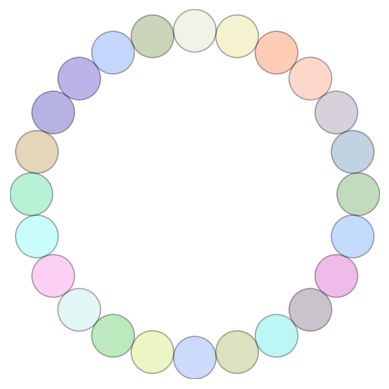

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()

r = 20 #radius of center circle
n = 24 # number of circles around 

# the math to calculate the radius of the smaller circles

def calc_r_small(r,n):
    theta1 = (2*np.pi)/n
    x2 = r*np.cos(theta1)
    y2 = r*np.sin(theta1)
    r_small = math.sqrt((x2-r)**2+(y2)**2)/2
    return(r_small)

# Draw n circles filled with random colors and add to the plot
# this is the same loop as above
def draw_n_circles(r, n):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False) # linspace creates equally spaced points
    for t in theta:
        x = r * np.cos(t)
        y = r * np.sin(t)
        color = random_hex_color()
        r_small = calc_r_small(r,n) # small circle radius is calculated
        draw_circle = plt.Circle((x, y), r_small, fill=True, edgecolor='black',facecolor=color,alpha=0.3)
        axes.add_artist(draw_circle)

draw_n_circles(r,n) #draw the circle, along with the smaller circles

#set the figure area square
axes.set_aspect(1)

#set axes limits 
axes.set_xlim(-(r+calc_r_small(r,n)), r+calc_r_small(r,n))
axes.set_ylim(-(r+calc_r_small(r,n)), r+calc_r_small(r,n))

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()

## One more layer of circles

If we can add another layer of circles inside, and one more inside, etc. this will start looking like some kind of a mandala. For this, we need to be able to calculate the radius of the silghtly smaller circle (r1) inside this. Once we have this raius, we know how to calculate the radius of the smaller circles (r_small1) that go around that circle. First, let's try get one more layer. 

### Radius of the next smaller circle

The radius of the next smaller circle (r1) will be less than the radius of this first circle (r). By how much? the difference of r and r1 cannot be less than r_small - if this, then the circle will overlap with the smaller circles. It need not be greater than 2\*r_small, because then the next layer of small circles do not touch this layer. 

We will make a guess of 1.5\*r_small and see if we can improve from there iteratively. 

### The math

The radius of the next small circle, r1 = r - 1.5\*r_small

once we have r1, we can use the same method as above to identify the points around that circle and draw circles of small radius. 

The code looks like below. I ran the code once and adjusted the 1.5 to 1.75.

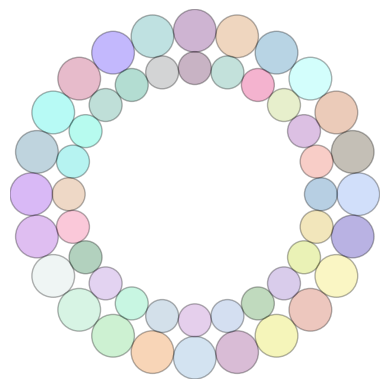

In [33]:

import numpy as np
import matplotlib.pyplot as plt
import random
import math

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()

r = 20 #radius of center circle
n = 24 # number of circles around 

#calculate the radius of the smaller circles

def calc_r_small(r,n):
    theta1 = (2*np.pi)/n
    x2 = r*np.cos(theta1)
    y2 = r*np.sin(theta1)
    r_small = math.sqrt((x2-r)**2+(y2)**2)/2
    return(r_small)

# Draw n circles with random colors and add to the plot 

def draw_n_circles(r, n):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    for t in theta:
        x = r * np.cos(t)
        y = r * np.sin(t)
        color = random_hex_color()
        r_small = calc_r_small(r,n)
        draw_circle = plt.Circle((x, y), r_small, fill=True, edgecolor='black',facecolor=color,alpha=0.3)
        axes.add_artist(draw_circle)
    

r1 = r - 1.75 * calc_r_small(r, n) # smaller circle diameter

draw_n_circles(r, n)# draw larger circle, with small circles
draw_n_circles(r1, n)# draw the smaller circle, with small circles

#set the figure area square
axes.set_aspect(1)

#set axes limits 
axes.set_xlim(-(r+calc_r_small(r,n)), r+calc_r_small(r,n))
axes.set_ylim(-(r+calc_r_small(r,n)), r+calc_r_small(r,n))

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()

## Drawing more layers

Here is where the power of programming comes into play again. We can use another loop to calculate the radius of the next smaller circle and the next smaller circle etc. 

Here is how it looks. 

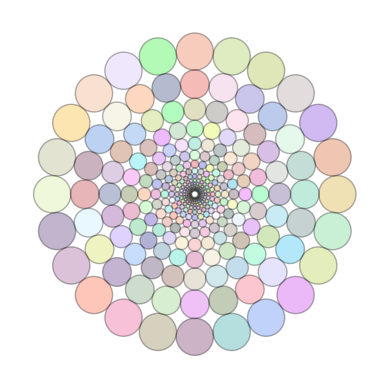

In [34]:

import numpy as np
import matplotlib.pyplot as plt
import random
import math

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()

r = 20 #radius of center circle
n = 24 # number of circles around 
num_layers = 15  # Number of layers of circles to draw
current_r = r

#calculate the radius of the smaller circles

def calc_r_small(r,n):
    theta1 = (2*np.pi)/n
    x2 = r*np.cos(theta1)
    y2 = r*np.sin(theta1)
    r_small = math.sqrt((x2-r)**2+(y2)**2)/2
    return(r_small)

# Draw n circles with random colors and add to the plot - shift_theta shifts starting angle by .5 times theta for odd layers
def draw_n_circles(r, n):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    for t in theta:
        x = r * np.cos(t)
        y = r * np.sin(t)
        color = random_hex_color()
        r_small = calc_r_small(r,n)
        draw_circle = plt.Circle((x, y), r_small, fill=True, edgecolor='black',facecolor=color,alpha=0.3)
        axes.add_artist(draw_circle)
    
# calculate subsequent radii and draw for the number of layers

for i in range(num_layers):
    current_r -= 1.75* calc_r_small(current_r, n)
    draw_n_circles(current_r, n)


#set the figure area square
axes.set_aspect(1)

#set axes limits 
axes.set_xlim(-r, r)
axes.set_ylim(-r, r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()

## The final touch

This looks fine, but all the circles are aligned, their centers are on the same line. It would be nice if the circles in the second layer can come in the space between the circles in the first layer and so on, right?

All we have to do is, ensure that for every alternate layer of circles, the centers shift by half of the angle difference between the centers of two circles. and that's our final touch. 

Here is the code with this change. 

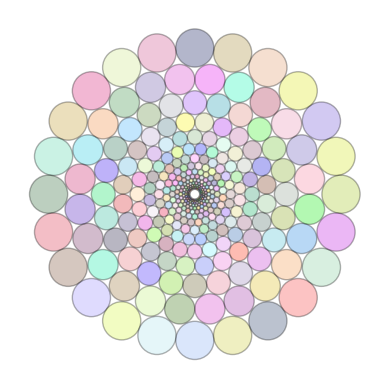

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import random
import math

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()

r = 20 #radius of center circle
n = 24 # number of circles around 
num_layers = 15  # Number of layers of circles to draw
current_r = r

#calculate the radius of the smaller circles

def calc_r_small(r,n):
    theta1 = (2*np.pi)/n
    x2 = r*np.cos(theta1)
    y2 = r*np.sin(theta1)
    r_small = math.sqrt((x2-r)**2+(y2)**2)/2
    return(r_small)

# Draw n circles with random colors and add to the plot - shift_theta shifts starting angle by .5 times theta for odd layers
def draw_n_circles(r, n, shift_theta=False):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    if shift_theta:
        theta += (2*np.pi / n)/2  # Shift by 0.5 theta
    for t in theta:
        x = r * np.cos(t)
        y = r * np.sin(t)
        color = random_hex_color()
        r_small = calc_r_small(r,n)
        draw_circle = plt.Circle((x, y), r_small, fill=True, edgecolor='black',facecolor=color,alpha=0.3)
        axes.add_artist(draw_circle)
    
# calculate subsequent radii and draw for the number of layers

for i in range(num_layers):
    shift_theta = (i % 2 == 1)  # Shift theta for odd layers
    current_r -= 1.6 * calc_r_small(current_r, n)
    draw_n_circles(current_r, n, shift_theta)


#set the figure area square
axes.set_aspect(1)

#set axes limits 
axes.set_xlim(-r, r)
axes.set_ylim(-r, r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()

And that is how one starts from something simple, moves step-by-step and ends up with something that looks slightly complex but much more beautiful! 

Now that we have figured how to do this with circles, we should think of introducing other shapes, especially triangles. Most good looking mandalas have traingles, and also, once we figure how to do traingles, we can combine them to create many other shapes! Wait for the next post or go ahead, write your own and share here! 